In [350]:
import numpy as np
import matplotlib.pyplot as plt
import os.path as path
import wget
from celluloid import Camera
import scipy as sp
from scipy import integrate

# 1.2 Presentación de funciones

Consideremos la serie $$ f(t) = 2 \sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{n} \sin(n t).$$

In [351]:
def f (t, n):
    return 2*(-1)**(n-1)*np.sin(n*t)/n

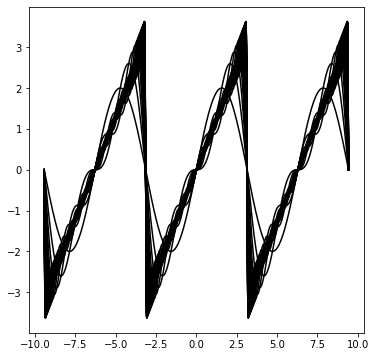

In [352]:
L = np.pi
x = np.linspace(-3*L, 3*L, 1000)
n = 1
nt = 50
F = 0
fig = plt.figure(figsize=(6,6))
camera = Camera(fig)

while n < nt:
    F += f(x,n)
    plt.plot(x,F,c='k')
    camera.snap()
    n += 1

In [353]:
animation = camera.animate()
animation.save('Fourier.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


# 1.4 Derivada espectral

In [354]:
def f(x):
    return np.multiply(np.exp(-0.1*x),np.sin(x))

In [355]:
def fprime(x):
    return np.multiply(np.exp(-0.1*x),np.cos(x)-0.1*np.sin(x))

In [356]:
def fspectral(x, Fs, N):
    fstep = Fs / N
    freq = np.linspace(-25, (N-1)*fstep-25, int(N))
    
    y = f(t)
    X = np.fft.fft(y)
    freq = np.fft.fftshift(freq)
    
    spectral_derivative = freq*X*(1j)
    return np.real(np.fft.ifft(spectral_derivative))

In [357]:
def fright(x):
    dx = 4*np.pi/100
    fright = np.zeros(len(x))
    
    for i in range(len(x)-1):
        fright[i] = (f(x[i+1])-f(x[i]))/dx
    return fright

In [358]:
Fs = 50 # frecuencia de muestreo
tstep = 4*np.pi/100 #1/Fs
f0 = 5
N = int ( 10 * Fs / f0 ) # Numero de muestras

In [359]:
t = np.linspace(-2*np.pi,(N-1)*tstep-2*np.pi,N)

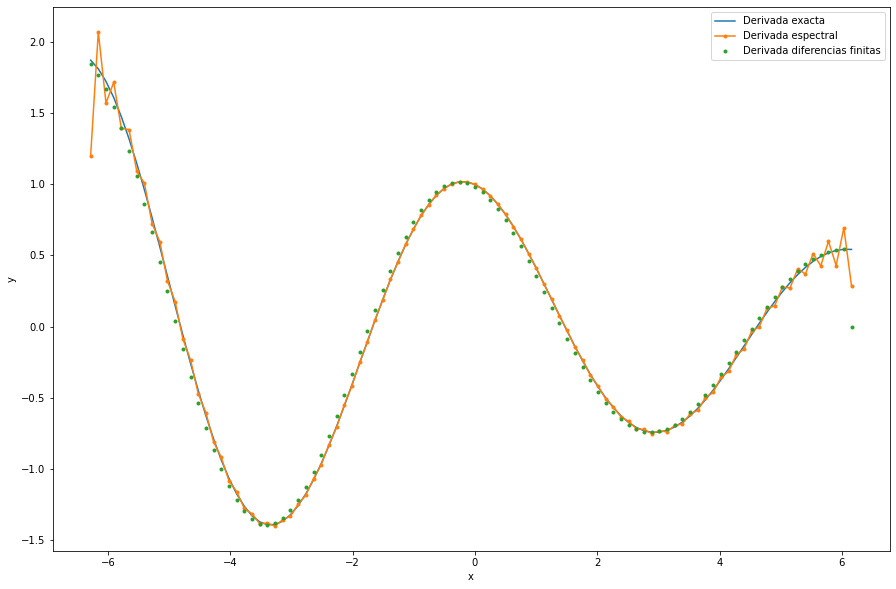

In [360]:
fig = plt.figure(figsize=(15,10))
plt.plot(t, fprime(t), label='Derivada exacta')
plt.plot(t, fspectral(t, Fs, N), '.-', label='Derivada espectral')
plt.plot(t, fright(t), '.', label='Derivada diferencias finitas')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# 1.5 Manchas solares

In [361]:
file = 'ManchasSolares.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionales/ManchasSolares.dat'
if not path.exists(file):
    Path_ = wget.download(url,file)
    print('Descargado')
else:
    Path_ = file

In [362]:
data = np.loadtxt(Path_)

In [363]:
data = data[data[:,0]>=1900]
t = data[:,0]+data[:,1]/12
ms = data[:,3]

In [364]:
prom = np.mean(ms)
ms = ms-prom
N = len(t)

In [365]:
X = np.fft.fft(ms)
XMag = np.abs(X)
freq = np.fft.fftfreq(N)

In [366]:
mask = freq<0
X[mask] = 0
freq[mask] = 0
XMag[mask] = 0

In [367]:
freq2 = freq[0:int(N/2+1)]
XMag2  = 2.0*XMag[0:int(N/2+1)]

<StemContainer object of 3 artists>

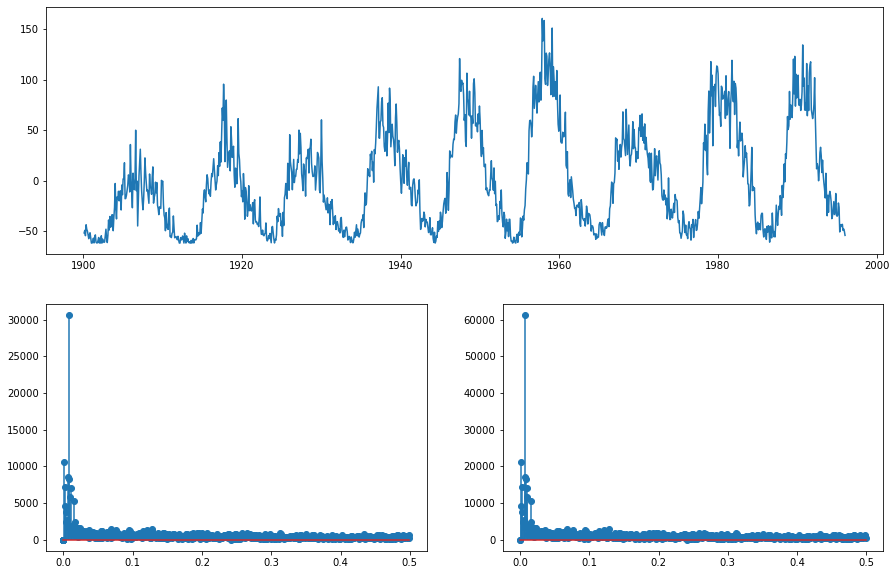

In [368]:
fig = plt.figure(figsize=(15,10))
ax2 = fig.add_subplot(2,1,1)
ax = fig.add_subplot(2,2,3)
ax1 = fig.add_subplot(2,2,4)
ax2.plot(t,ms)
ax.stem(freq, XMag)
ax1.stem(freq2, XMag2)

In [369]:
ii = np.argmax(XMag)
T = 1/freq[ii]
T = T/12 #Se divide entre 12 meses
print(ii,freq[ii], T)

9 0.0078125 10.666666666666666


/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


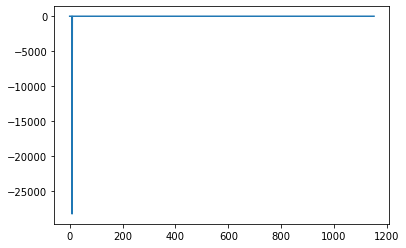

In [370]:
X[X != X[ii]] =0
newfreq = np.arange(len(X))
plt.plot(newfreq, X)

In [371]:
nueva = np.fft.ifft(X)
np.real(nueva)

array([-24.58493401, -25.05232274, -25.45935823, ..., -22.83261854,
       -23.47374343, -24.05831802])

Text(0, 0.5, 'Manchas Solares')

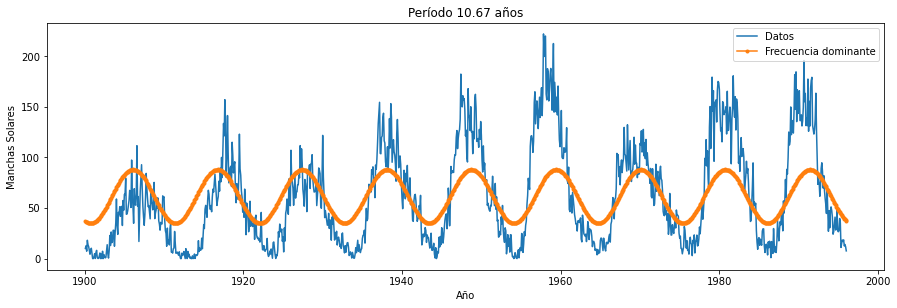

In [372]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2,1,1)
ax.plot(t,ms+prom,label='Datos')
ax.plot(t,np.real(nueva)+prom,'.-',label='Frecuencia dominante')
plt.legend(loc=1)
plt.title(r'Período %.2f años' %(T))
plt.xlabel('Año')
plt.ylabel('Manchas Solares')